Adatok importálása, Rds online fileból, ez már a szűrt, a kód egyszerűsítése érdekében.

In [1]:
!pip install pyreadr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.9/440.9 kB 2.6 MB/s eta 0:00:00


In [2]:
import pyreadr

url = "https://files.nagbalae.hu/public/2024-03-29-szurt.rds"
dst_path = "/home/data.Rds"
df = pyreadr.read_r(pyreadr.download_file(url, dst_path))[None]

In [3]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

In [4]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sb
import sklearn as sk
from sklearn import preprocessing as pp
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold

In [6]:
X = pp.MinMaxScaler().fit_transform(pd.get_dummies(df.drop(columns=["Vételár"])))
y = pp.MinMaxScaler().fit_transform(df.Vételár.to_numpy().reshape(-1,1))
X.shape

(59130, 15)

Egy hidden layeres nn

In [39]:
net = Sequential()
net.add(Dense(units=8, activation="relu", input_dim = 15))
net.add(Dense(units=1, activation="sigmoid"))
net.compile(loss="mse", optimizer="adam", metrics="mae")
net.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 8)                 128       
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 137 (548.00 Byte)
Trainable params: 137 (548.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
stop_pls = EarlyStopping(patience=5, monitor="mae")
tanult = net.fit(X,y, validation_split=0.2, epochs = 100, callbacks=stop_pls)

Epoch 1/100
1479/1479 [==============================] - 10s 6ms/step - loss: 0.0044 - mae: 0.0468 - val_loss: 0.0021 - val_mae: 0.0329
Epoch 2/100
1479/1479 [==============================] - 13s 9ms/step - loss: 0.0019 - mae: 0.0294 - val_loss: 0.0019 - val_mae: 0.0302
Epoch 3/100
1479/1479 [==============================] - 9s 6ms/step - loss: 0.0017 - mae: 0.0286 - val_loss: 0.0018 - val_mae: 0.0291
Epoch 4/100
1479/1479 [==============================] - 14s 9ms/step - loss: 0.0017 - mae: 0.0281 - val_loss: 0.0017 - val_mae: 0.0285
Epoch 5/100
1479/1479 [==============================] - 10s 7ms/step - loss: 0.0016 - mae: 0.0277 - val_loss: 0.0017 - val_mae: 0.0286
Epoch 6/100
1479/1479 [==============================] - 9s 6ms/step - loss: 0.0015 - mae: 0.0273 - val_loss: 0.0016 - val_mae: 0.0282
Epoch 7/100
1479/1479 [==============================] - 12s 8ms/step - loss: 0.0015 - mae: 0.0270 - val_loss: 0.0016 - val_mae: 0.0277
Epoch 8/100
1479/1479 [===========================

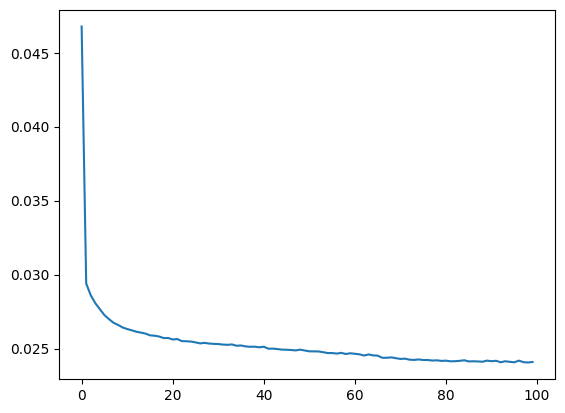

In [43]:
mp.plot(tanult.history['mae'])

In [10]:
keresztval=KFold(n_splits=5, shuffle=True)
mae=[]
for tanulo, val in keresztval.split(X,y):
 tanulas=net.fit(X[tanulo], y[tanulo], epochs=10)
 scores=net.evaluate(X[val], y[val], verbose=0)
 mae.append(scores[1])
np.mean(mae)

Epoch 1/10
1479/1479 [==============================] - 14s 9ms/step - loss: 0.0014 - mae: 0.0267
Epoch 2/10
1479/1479 [==============================] - 16s 11ms/step - loss: 0.0014 - mae: 0.0267
Epoch 3/10
1479/1479 [==============================] - 15s 10ms/step - loss: 0.0014 - mae: 0.0267
Epoch 4/10
1479/1479 [==============================] - 15s 10ms/step - loss: 0.0014 - mae: 0.0267
Epoch 5/10
1479/1479 [==============================] - 11s 7ms/step - loss: 0.0013 - mae: 0.0266
Epoch 6/10
1479/1479 [==============================] - 10s 7ms/step - loss: 0.0013 - mae: 0.0266
Epoch 7/10
1479/1479 [==============================] - 9s 6ms/step - loss: 0.0013 - mae: 0.0266
Epoch 8/10
1479/1479 [==============================] - 7s 5ms/step - loss: 0.0013 - mae: 0.0265
Epoch 9/10
1479/1479 [==============================] - 8s 5ms/step - loss: 0.0013 - mae: 0.0265
Epoch 10/10
1479/1479 [==============================] - 7s 5ms/step - loss: 0.0013 - mae: 0.0264
Epoch 1/10
1479/1479

2.606091946363449

Deep neural net, két hidden layerrel

In [11]:
net2 = Sequential()
net2.add(Dense(units=8, activation="relu", input_dim = 15))
net2.add(Dense(units=3, activation="relu"))
net2.add(Dense(units=1, activation="sigmoid"))
net2.compile(loss="mse", optimizer="adam", metrics="mae")
net2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 128       
                                                                 
 dense_3 (Dense)             (None, 3)                 27        
                                                                 
 dense_4 (Dense)             (None, 1)                 4         
                                                                 
Total params: 159 (636.00 Byte)
Trainable params: 159 (636.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
tanult=net2.fit(X, y, validation_split=0.2, epochs=100, callbacks=stop_pls)

Epoch 1/100
1479/1479 [==============================] - 12s 8ms/step - loss: 0.0013 - mae: 0.0262 - val_loss: 0.0013 - val_mae: 0.0258
Epoch 2/100
1479/1479 [==============================] - 11s 7ms/step - loss: 0.0013 - mae: 0.0262 - val_loss: 0.0014 - val_mae: 0.0262
Epoch 3/100
1479/1479 [==============================] - 14s 9ms/step - loss: 0.0013 - mae: 0.0262 - val_loss: 0.0013 - val_mae: 0.0258
Epoch 4/100
1479/1479 [==============================] - 14s 9ms/step - loss: 0.0013 - mae: 0.0262 - val_loss: 0.0013 - val_mae: 0.0258
Epoch 5/100
1479/1479 [==============================] - 13s 9ms/step - loss: 0.0013 - mae: 0.0262 - val_loss: 0.0013 - val_mae: 0.0258
Epoch 6/100
1479/1479 [==============================] - 14s 9ms/step - loss: 0.0013 - mae: 0.0261 - val_loss: 0.0013 - val_mae: 0.0256
Epoch 7/100
1479/1479 [==============================] - 14s 9ms/step - loss: 0.0013 - mae: 0.0261 - val_loss: 0.0014 - val_mae: 0.0263
Epoch 8/100
1479/1479 [=========================

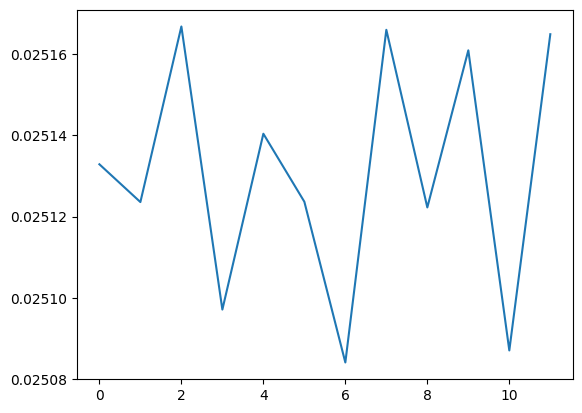

In [34]:
mp.plot(tanult.history['mae'])

Modellek R négyzetei, hogy a többi módszerrel össze lehessen ez alapján hasonlítani a teljesítményüket

In [28]:
from sklearn.metrics import r2_score
net_r2 = r2_score(y, net.predict(X))
net2_r2 = r2_score(y, net2.predict(X))
print({"net":net_r2, "net2":net2_r2})

1848/1848 [==============================] - 9s 5ms/step
{'net': 0.910372587994108, 'net2': 0.9129490798662727}


Autoencoder

In [50]:
 halo=Sequential()
 halo.add(Dense(6, input_dim=15, activation='relu', name='rejtett'))
 halo.add(Dense(15, activation='linear'))
 halo.summary()
 halo.compile(loss='mse', optimizer='adam')
 tanulas=halo.fit(X, X, epochs=50, validation_split=0.2)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rejtett (Dense)             (None, 6)                 96        
                                                                 
 dense_9 (Dense)             (None, 15)                105       
                                                                 
Total params: 201 (804.00 Byte)
Trainable params: 201 (804.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
1479/1479 [==============================] - 14s 8ms/step - loss: 0.0579 - val_loss: 0.0248
Epoch 2/50
1479/1479 [==============================] - 10s 6ms/step - loss: 0.0153 - val_loss: 0.0131
Epoch 3/50
1479/1479 [==============================] - 9s 6ms/step - loss: 0.0123 - val_loss: 0.0126
Epoch 4/50
1479/1479 [==============================] - 11s 7ms/step - loss: 0.0122 - val_loss: 0.0125
E

In [51]:
autoenc_r2 = r2_score(X, halo.predict(X))
print(autoenc_r2)

1848/1848 [==============================] - 9s 5ms/step
0.9163783139950366


Kolmogorov-Arnold Net, [paper arxiv link](https://arxiv.org/html/2404.19756v1)

In [14]:
!pip install pykan

In [15]:
from kan import *
import torch
# create a KAN: 5D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[3,2,1], grid=5, k=3, seed=0)

In [16]:
from random import choices
# mókolás, hogy ne foglaljon el túl sok ramot a modell
felhasznalt = np.array(choices([1,0,0,0,0,0], k=X.shape[0]), dtype=bool)
X_t = df[["Kmóraállás","Teljesítmény","Kor"]][felhasznalt]
y_t = df["Vételár"][felhasznalt]

train_set = np.array(choices([1,0], k=X_t.shape[0]), dtype=bool)
X_tr = torch.from_numpy(X_t[train_set].to_numpy())
y_tr = torch.from_numpy(y_t[train_set].to_numpy())

X_te = torch.from_numpy(X_t[~train_set].to_numpy())
y_te = torch.from_numpy(y_t[~train_set].to_numpy())

dataset = {"train_input" : X_tr, "test_input": X_te, "train_label" : y_tr, "test_label": y_te}

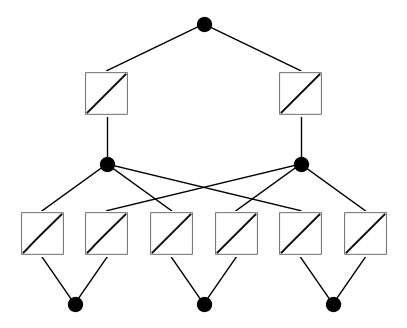

In [17]:
model(dataset["train_input"])
model.plot(beta=100)

train loss: 1.10e+00 | test loss: 1.10e+00 | reg: 1.25e+00 : 100%|██| 20/20 [00:56<00:00,  2.80s/it]


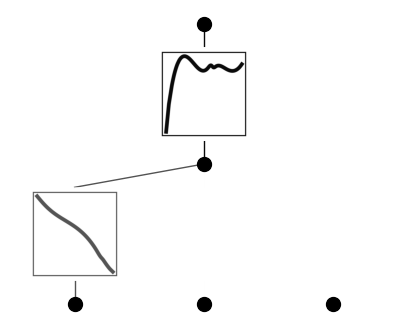

In [46]:
model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.)
model.plot()

In [ ]:
model.

In [45]:
model= model.prune()
model.plot(mask=True)

AttributeError: 'KAN' object has no attribute 'acts'

In [19]:
model= model.prune()
model.plot(mask=True)
model(dataset['train_input'])
model.plot()
model.train(dataset, opt="LBFGS", steps=20);
model.plot()


AttributeError: 'KAN' object has no attribute 'acts_scale'

In [26]:
mode = "auto" # "manual"

if mode == "manual":
    # manual mode
    model.fix_symbolic(0,0,0,'sin');
    model.fix_symbolic(0,1,0,'x^2');
    model.fix_symbolic(1,0,0,'exp');
elif mode == "auto":
    # automatic mode
    lib = ['1/x','x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=lib)

AttributeError: 'KAN' object has no attribute 'acts'

In [ ]:
model.train(dataset, opt="LBFGS", steps=20)
model.symbolic_formula()[0][0]